<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Llama3_2_Multimodal_Demo_Single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install --upgrade transformers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Datasets_Weights/LlaMA

datasets  hub  token


#Restart the session please!

/root/.cache/huggingface/token

#Must Run This Cell Separately to Set the HF HOME

In [1]:
import os
os.environ['HF_HOME'] = '/content/drive/MyDrive/Datasets_Weights/LlaMA'
hf_home = os.path.expanduser(
    os.getenv("HF_HOME", os.path.join(os.getenv("XDG_CACHE_HOME", "~/.cache"), "huggingface"))
)
print(hf_home)

/content/drive/MyDrive/Datasets_Weights/LlaMA


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.02 GiB. GPU 0 has a total capacity of 14.75 GiB of which 13.06 MiB is free. Process 11118 has 14.73 GiB memory in use. Of the allocated memory 14.36 GiB is allocated by PyTorch, and 258.99 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

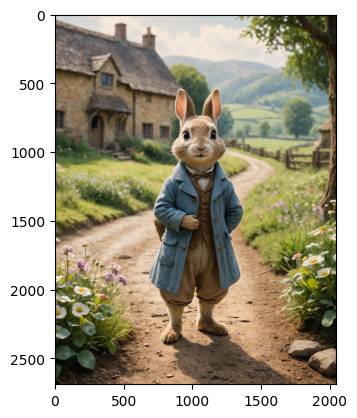

In [3]:
import matplotlib.pyplot as plt
import requests
import torch
from torch import nn
from transformers import MllamaForConditionalGeneration, AutoProcessor, MllamaConfig, AutoModelForCausalLM
from typing import List, Optional, Tuple, Union
from PIL import Image
import matplotlib.pyplot as plt

model_id = "meta-llama/Llama-3.2-11B-Vision"
processor = AutoProcessor.from_pretrained(model_id)
model = MllamaForConditionalGeneration.from_pretrained(
            model_id, torch_dtype=torch.bfloat16, device_map="auto",
        )

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)

model.eval()
with torch.no_grad():
    prompt = "<|image|><|begin_of_text|>If I had to write a haiku for this one"
    inputs = processor(image, prompt, return_tensors="pt").to(model.device)
    output = model.generate(**inputs, max_new_tokens=30)
    print(processor.decode(output[0]))

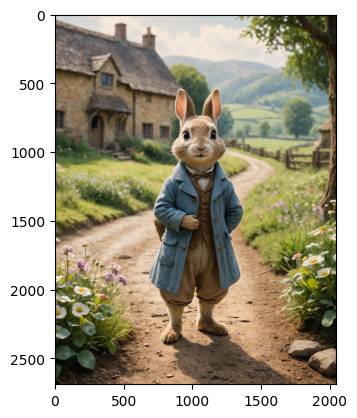

In [ ]:
import matplotlib.pyplot as plt
processor = AutoProcessor.from_pretrained(model_id)
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
prompt = "<|image|><|begin_of_text|>If I had to write a haiku for this one"
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

input_ids : torch.Size([1, 14])
attention_mask : torch.Size([1, 14])
pixel_values : torch.Size([1, 1, 4, 3, 448, 448])
aspect_ratio_ids : torch.Size([1, 1])
aspect_ratio_mask : torch.Size([1, 1, 4])
cross_attention_mask : torch.Size([1, 14, 1, 4])
tensor([[6]], device='cuda:0') tensor([[[1, 1, 1, 1]]], device='cuda:0')


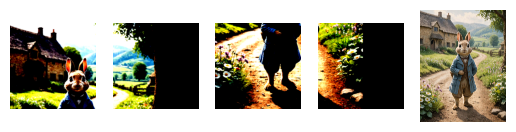

In [4]:
for key, value in inputs.items():
    print(key,':', value.shape)

print(inputs['aspect_ratio_ids'], inputs['aspect_ratio_mask'])
plt.subplot(151);plt.axis('OFF'); plt.imshow(inputs['pixel_values'].squeeze()[0].permute(1,2,0).cpu())
plt.subplot(152);plt.axis('OFF'); plt.imshow(inputs['pixel_values'].squeeze()[1].permute(1,2,0).cpu())
plt.subplot(153);plt.axis('OFF'); plt.imshow(inputs['pixel_values'].squeeze()[2].permute(1,2,0).cpu())
plt.subplot(154);plt.axis('OFF'); plt.imshow(inputs['pixel_values'].squeeze()[3].permute(1,2,0).cpu())
plt.subplot(155);plt.axis('OFF'); plt.imshow(image)

In [ ]:
from transformers import MllamaForConditionalGeneration, AutoProcessor, MllamaConfig
configuration = MllamaConfig()
print(configuration._attn_implementation)
print(configuration.text_config)
# print(configuration.vision_config)

eager
MllamaTextConfig {
  "bos_token_id": 128000,
  "cross_attention_layers": [
    3,
    8,
    13,
    18,
    23,
    28,
    33,
    38
  ],
  "dropout": 0,
  "eos_token_id": 128001,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermediate_size": 14336,
  "max_position_embeddings": 131072,
  "model_type": "mllama_text_model",
  "num_attention_heads": 32,
  "num_hidden_layers": 40,
  "num_key_value_heads": 8,
  "pad_token_id": 128004,
  "rms_norm_eps": 1e-05,
  "rope_scaling": null,
  "rope_theta": 500000,
  "tie_word_embeddings": false,
  "transformers_version": "4.45.2",
  "use_cache": true,
  "vocab_size": 128256
}



In [ ]:
model.language_model

MllamaForCausalLM(
  (model): MllamaTextModel(
    (embed_tokens): Embedding(128264, 4096, padding_idx=128004)
    (layers): ModuleList(
      (0-2): 3 x MllamaSelfAttentionDecoderLayer(
        (self_attn): MllamaTextSelfSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MllamaTextMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MllamaTextRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MllamaTextRMSNorm((4096,), eps=1e-05)
     

In [ ]:
model

MllamaForConditionalGeneration(
  (vision_model): MllamaVisionModel(
    (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
    (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
      (tile_embedding): Embedding(9, 5248000)
    )
    (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
      (embedding): Embedding(9, 5120)
    )
    (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
      (embedding): Embedding(9, 5120)
    )
    (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    (transformer): MllamaVisionEncoder(
      (layers): ModuleList(
        (0-31): 32 x MllamaVisionEncoderLayer(
          (self_attn): MllamaVisionSdpaAttention(
            (q_proj): Linear(in_features=1280, out_features=1280, bias=False)
            (k_proj): Linear(in_features=1280, out_features=1280, b